<a href="https://colab.research.google.com/github/Divyajyoti02/CyborgBootcampWeek6/blob/main/CyborgAuomationBootcampWeek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
print("import successful")
print(cv.__version__)

import successful
4.1.2


2d matrix


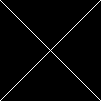

3d matrix


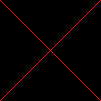

In [ ]:
size = 101
img = np.zeros((size, size, 3), np.int16)
# print letter X
channel = 2 # BGR 
for i in range(size):
  img[i][i][channel] = 255
  img[i][size-i-1][channel] = 255
print("2d matrix")
cv2_imshow(img[:,:,channel])
print("3d matrix")
cv2_imshow(img)

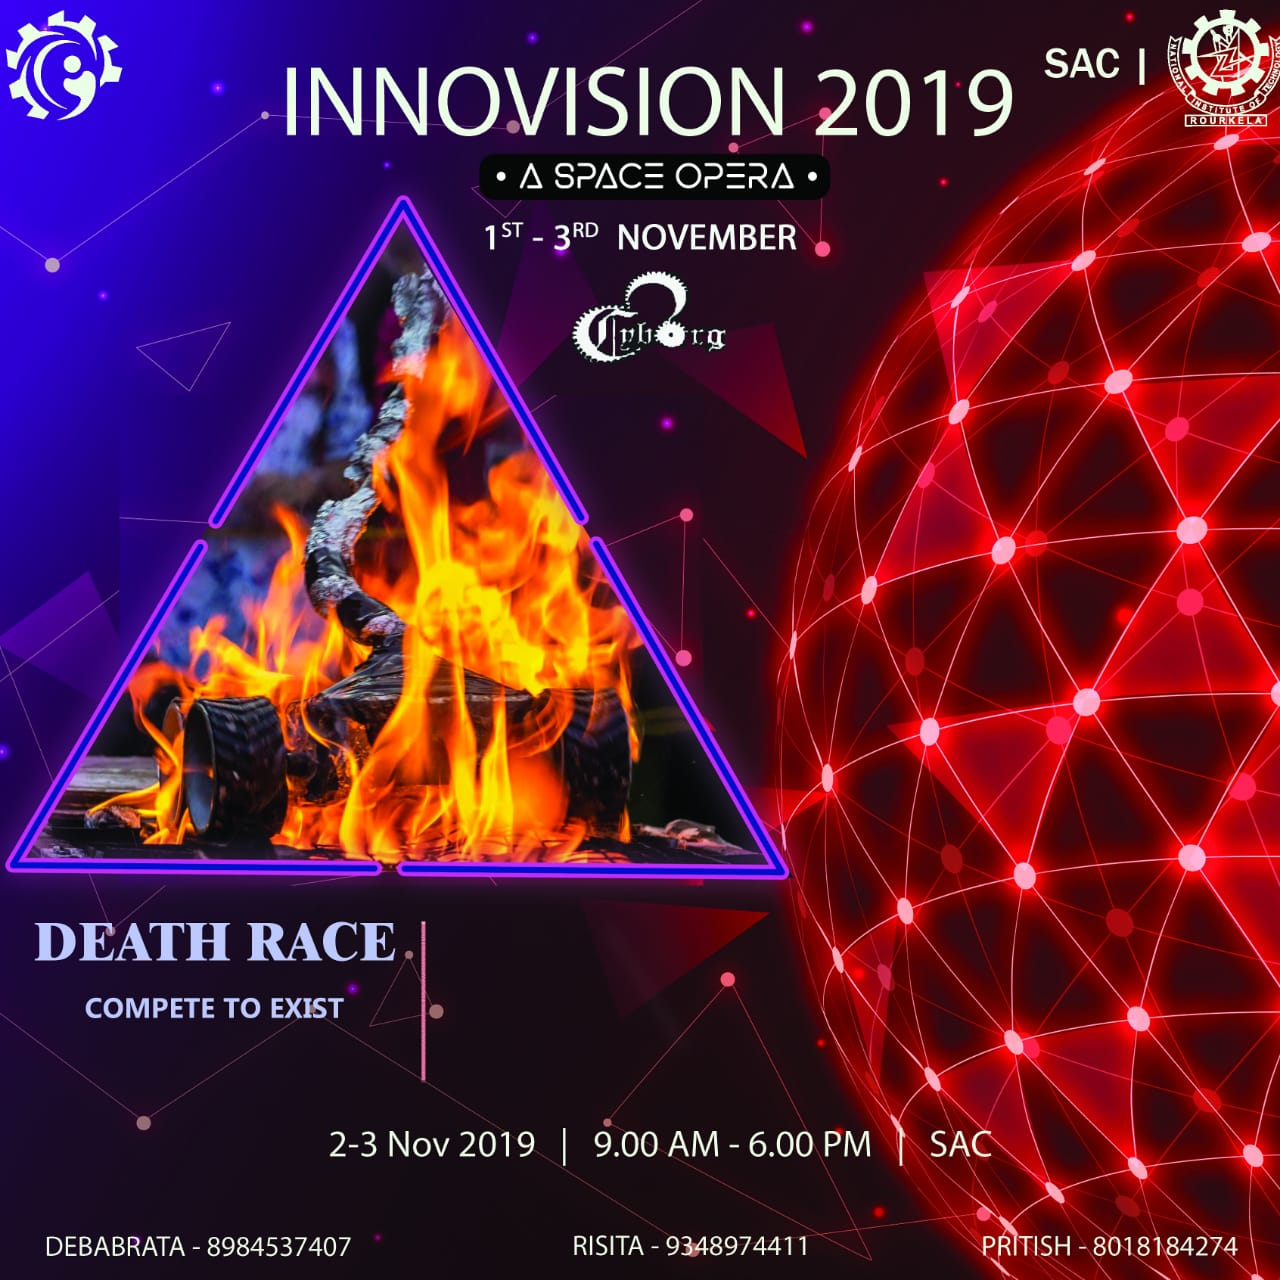

(1280, 1280, 3)


In [ ]:
# read and display image
im_path = "/content/innv.jpg";
poster = cv.imread(im_path)
shp = poster.shape
cv2_imshow(poster)
print(shp)

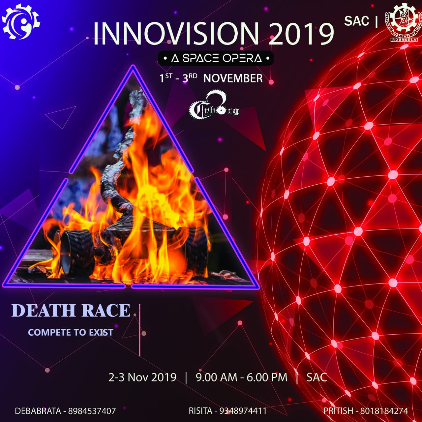

(422, 422, 3)


In [ ]:
fac = 0.33
new_dim = int(shp[0] * fac), int(shp[1] * fac)
low_res_poster = cv.resize(poster, new_dim)
cv2_imshow(low_res_poster)
print(low_res_poster.shape)
# np(x,y) = Sum( p(x-))

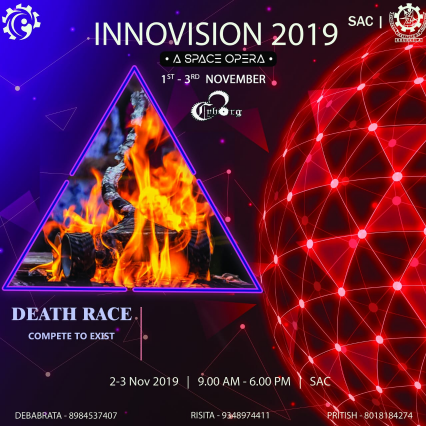

(426, 426, 3)


In [ ]:
# how low resolution in done
def makeLowReso(poster, fac = 3):
  shp = poster.shape
  low_res_poster = np.zeros((int(shp[0]/fac), int(shp[1]/fac), shp[2]) )
  i, j = 0, 0
  while i + fac < shp[0]:
    j = 0
    while j + fac < shp[1]:
      for ix in range(0,fac):
        for jx in range(0,fac):
          low_res_poster[int(i/fac)][int(j/fac)][0] += poster[i+ix][j+jx][0]
          low_res_poster[int(i/fac)][int(j/fac)][1] += poster[i+ix][j+jx][1]  
          low_res_poster[int(i/fac)][int(j/fac)][2] += poster[i+ix][j+jx][2]  
      j += fac
    i += fac
  low_res_poster = low_res_poster/(fac*fac)
  return low_res_poster

low_res_poster2 = makeLowReso(poster)
cv2_imshow(low_res_poster2)
print(low_res_poster2.shape)

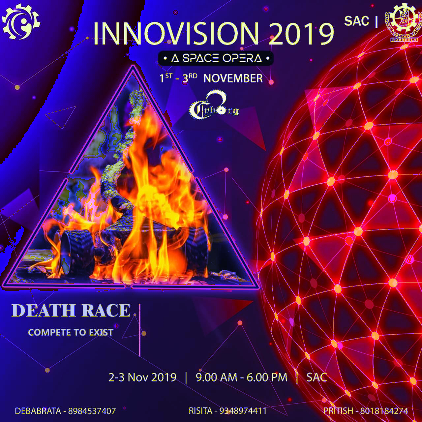

----


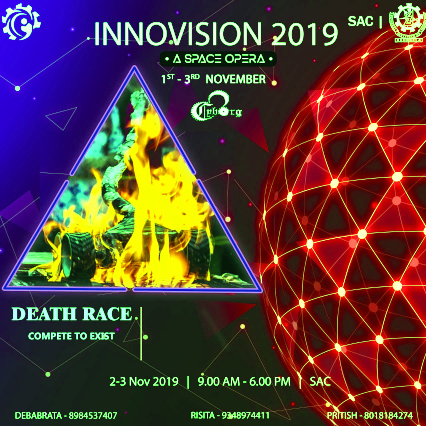

----


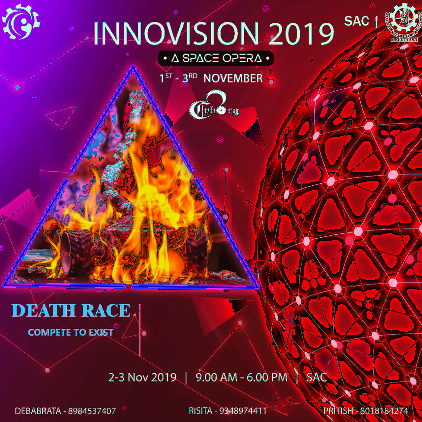

----


In [ ]:
# manipulating the color space of the image
def normalize(mat, mxv = 255): # clip values between 0 -> 255
  return np.clip(mat, 0, mxv)

incr = 3
# increase blue channel weight
tmp = np.copy(low_res_poster)
tmp[:,:,0] *= incr 
blue_im = normalize(tmp)
cv2_imshow(blue_im)
print("----")
# increase green channel weight
tmp = np.copy(low_res_poster2)
tmp[:,:,1] *= incr
green_im = normalize(tmp)
cv2_imshow(green_im)
print("----")
# increase red channel weight
tmp = np.copy(low_res_poster)
tmp[:,:,2] *= incr
red_im = normalize(tmp)
cv2_imshow(red_im)
print("----")

(911, 957, 3)


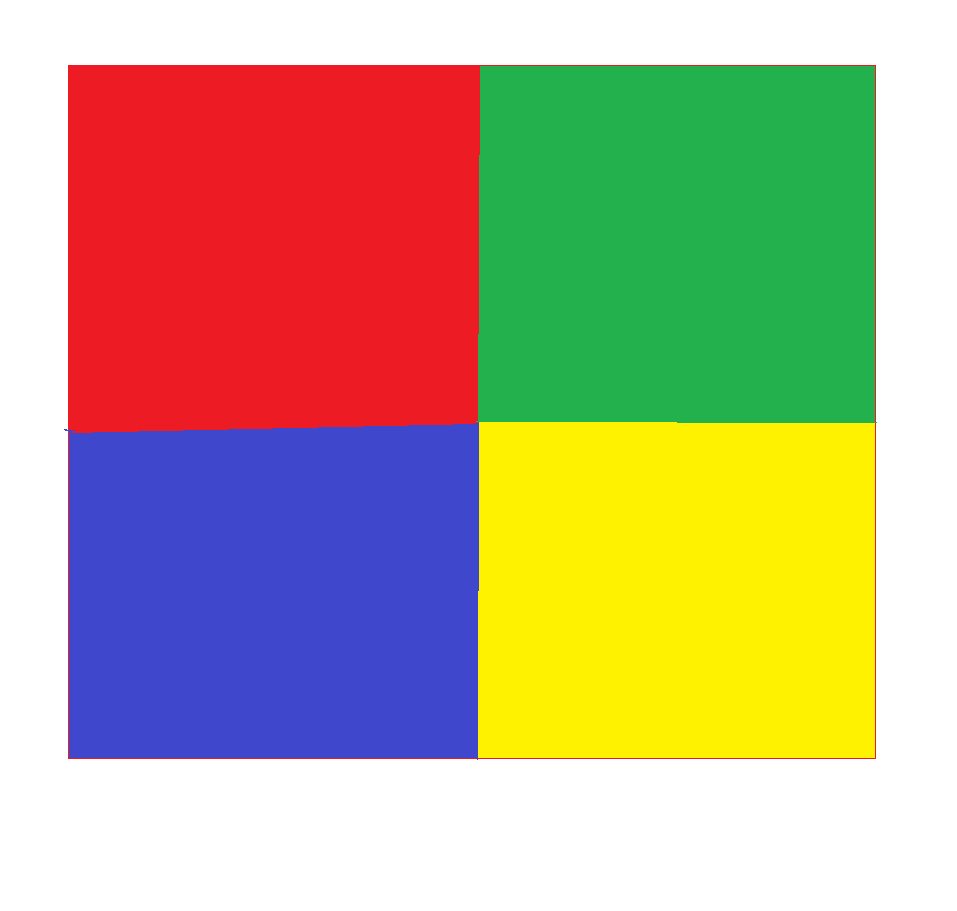

-----


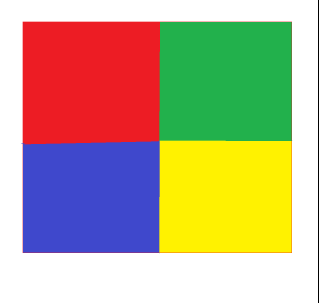

In [ ]:
# thresholding 
im_path = "/content/logo.png"
logo = cv.imread(im_path)
logo_shp = logo.shape
print(logo_shp)
cv2_imshow(logo)
# print("-----")
# fac = 0.33
# new_dim = (int(logo_shp[0] * fac), int(logo_shp[1] * fac))
# low_logo = np.resize(logo, new_dim, interpolation = cv.INTER_AREA)
# cv2_imshow(low_logo)
print("-----")
low_logo = makeLowReso(logo)
cv2_imshow(low_logo)

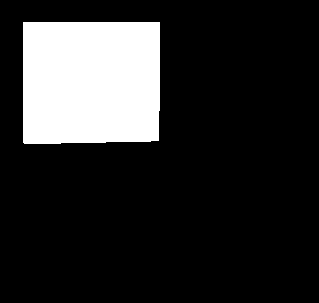

(303, 319)


In [ ]:
# thresholding BGR
low, high = (0,0,128), (100,100,255)
red_mask = cv.inRange(low_logo, low, high)
cv2_imshow(red_mask)
print(red_mask.shape)

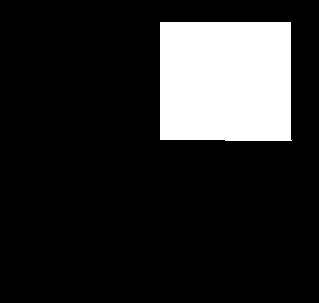

(303, 319)


In [ ]:
# green part
low, high = (0,128,0), (100,255,100)
green_mask = cv.inRange(low_logo, low, high)
cv2_imshow(green_mask)
print(green_mask.shape)

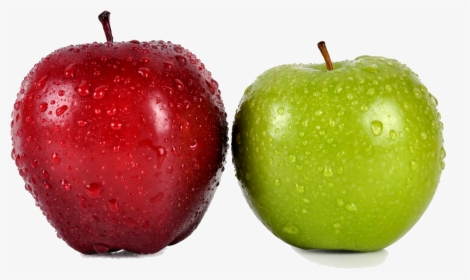

In [ ]:
im_path = "/content/app.png";
app = cv.imread(im_path)
app_shp = app.shape
cv2_imshow(app)

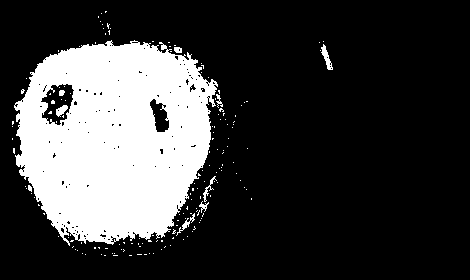

-----


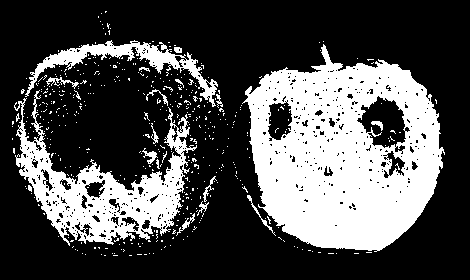

In [ ]:
# Apple thresholding 
low, high = (0,0,100), (100,100,255)
red_mask = cv.inRange(app, low, high)
cv2_imshow(red_mask)
print("-----")
low, high = (0,20,100), (100,255,180)
green_mask = cv.inRange(app, low, high)
cv2_imshow(green_mask)

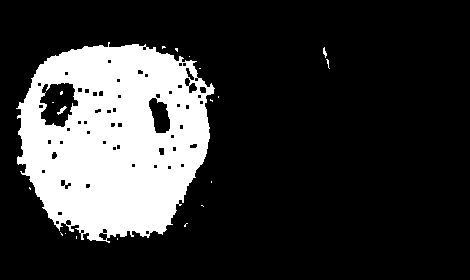

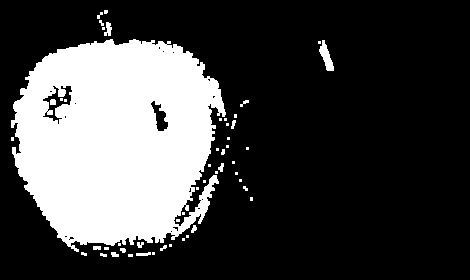

In [ ]:
# eroding and dilating
# erosion -> decrease size of threshold area, dilation -> increase size of threshold area
ksize, iter = 1, 10
kernel = np.ones((2*ksize + 1, 2*ksize + 1), np.uint8)
erode_mask = cv.erode(red_mask, kernel, iter)
cv2_imshow(erode_mask)
dilate_mask = cv.dilate(red_mask, kernel, iter)
cv2_imshow(dilate_mask)

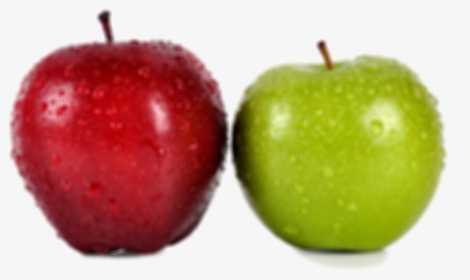

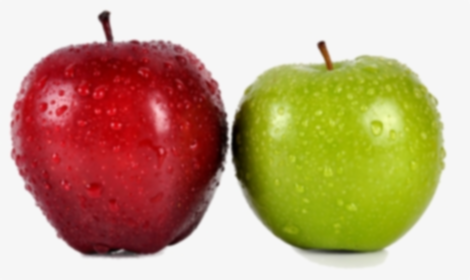

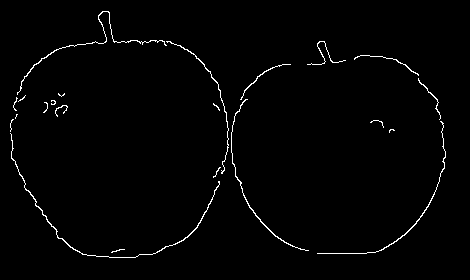

(280, 470)


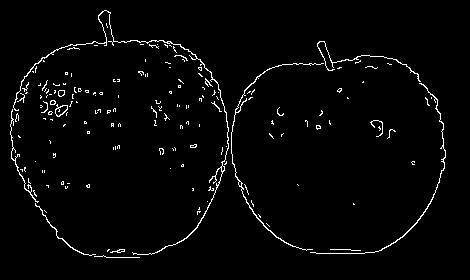

In [ ]:
# edge detection 
app_blur = cv.blur(app, (5,5)) # blur 
app_gblur = cv.GaussianBlur(app, (5,5), 0) # gaussian blur
cv2_imshow(app_blur)
cv2_imshow(app_gblur)
edges = cv.Canny(app_gblur,250,350) # detect edge
cv2_imshow(edges)
print(edges.shape)
cv2_imshow(cv.Canny(app,250,350)) # without smoothening

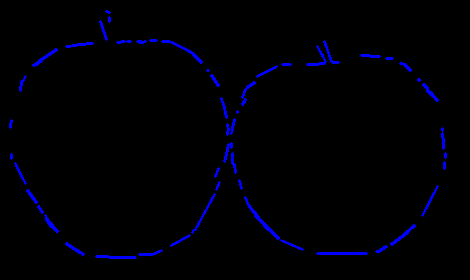

In [ ]:
# hough line 
lines = cv.HoughLinesP(edges,1,np.pi/180,20,minLineLength=1,maxLineGap=1)
canvas = np.zeros(app.shape)
if len(lines):
  for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(canvas,(x1,y1),(x2,y2),(255,0,0),2)
else: print("Empty")
cv2_imshow(canvas)

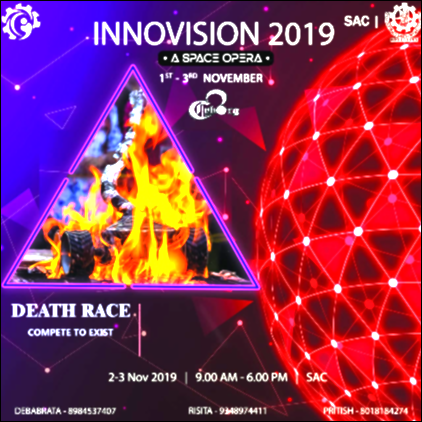

In [ ]:
# But how these all operations are done? 
kr1 = [[1,1,1],[1,1,1],[1,1,1]]
kr2 = [[1,2,1],[2,5,2],[1,2,1]]
kr25 = [[1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1], [1,1,1,1,1]]
kr3 = [[0,1,0],[-1,5,-1],[0,-1,0]]
kr4 = [[-1,1,-1],[-1,8,-1],[-1,-1,-1]]
kernel1 = np.array(kr1).reshape((3,3))
kernel2 = np.array(kr2).reshape((3,3))
kernel25 = np.array(kr25).reshape((5,5))
kernel3 = np.array(kr3).reshape((3,3))
kernel4 = np.array(kr4).reshape((3,3))

def normalizeVal(val):
  if val > 0: return min(val, 255)
  else: return 0

def kOperate(im, kr, w=1):
  dim = im.shape
  ksize = kr.shape
  offsetx = int(ksize[0]/2)
  offsety = int(ksize[1]/2)
  newIm = np.zeros(dim)
  for i in range(offsetx, dim[0]-offsetx):
    for j in range(offsety, dim[1]-offsety):
      tmp = np.copy(im[i-offsetx:i+offsetx+1, j-offsety:j+offsety+1, :])
      newIm[i,j,0] = normalizeVal(np.sum(tmp[:,:,0] * kr * w))
      newIm[i,j,1] = normalizeVal(np.sum(tmp[:,:,1] * kr * w))
      newIm[i,j,2] = normalizeVal(np.sum(tmp[:,:,2] * kr * w))
  return newIm

cv2_imshow(kOperate(low_res_poster, kernel2, 1/9))

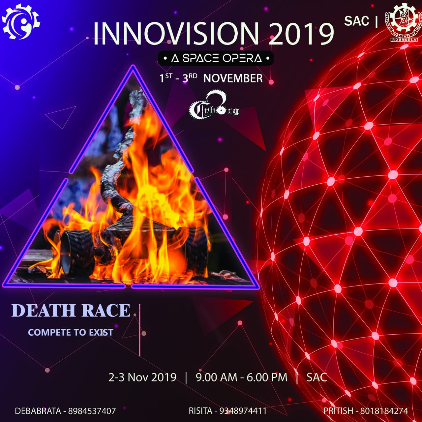

BLur 5x5


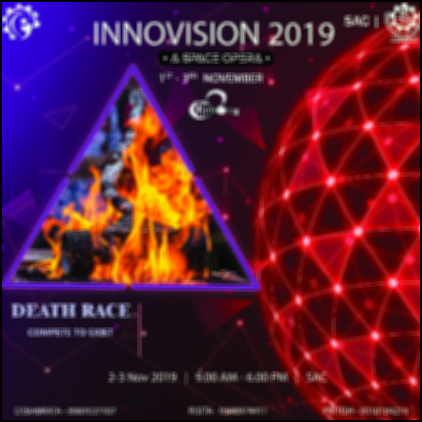

Sharpen


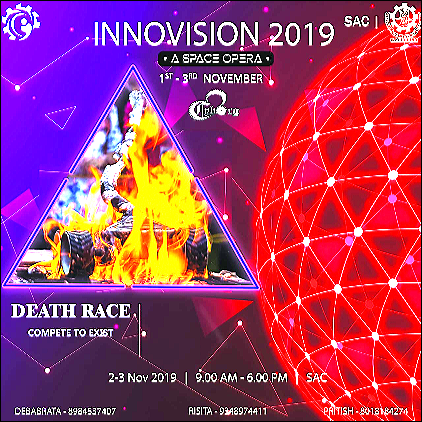

Edge


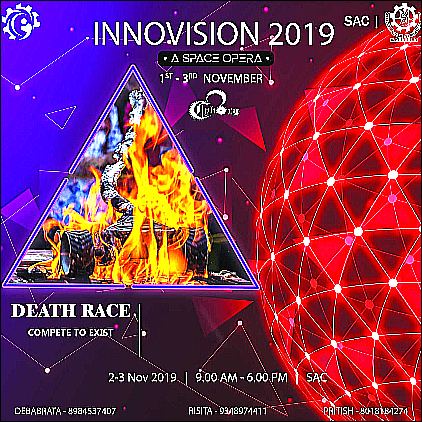

In [ ]:
# blur 5x5 
cv2_imshow(low_res_poster)
print("BLur 5x5")
cv2_imshow(kOperate(low_res_poster, kernel25, 1/25))
print("Sharpen")
cv2_imshow(kOperate(low_res_poster, kernel3))
print("Edge")
cv2_imshow(kOperate(low_res_poster, kernel4))

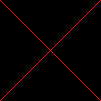

In [ ]:
# back to letter X
cv2_imshow(img)

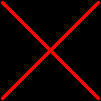

next


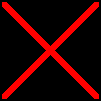

next
[[1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1.]]


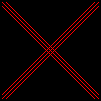

In [ ]:
myKernel1 = np.array([[1,2,1],[2,4,2],[1,2,1]]).reshape(3,3)
myKernel2 = np.array([[1,2,3,2,1], [2,3,4,3,2], [3,4,5,4,3], [2,3,4,3,2], [1,2,3,2,1]]).reshape(5,5)
cv2_imshow(kOperate(img, myKernel1))
print("next")
cv2_imshow(kOperate(img, myKernel2))
print("next")
ksz = 5
kkr = np.zeros((ksz, ksz))
kkr[0,0] = 1
kkr[0,ksz-1] = 1
kkr[ksz-1,ksz-1] = 1
kkr[ksz-1,0] = 1
print(kkr)
tmp = kOperate(img, kkr)
cv2_imshow(tmp)
# print("next")
# cv2_imshow(kOperate(tmp, myKernel1))